<a href="https://colab.research.google.com/github/BYU-Hydroinformatics/ggst-notebooks/blob/main/process_raw_data_from_ggst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import CSV File

Upload and import CSV file and convert date file to datatime object. This should be the GWSa file exported from the GGST web appliction.

In [ ]:
# Upload file

from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  uploaded_file_name = fn
  print(f'User uploaded file "{fn}"')

Saving dominican-republic-regio.csv to dominican-republic-regio.csv
User uploaded file "dominican-republic-regio.csv"


In [ ]:
# Import file to dataframe.

import pandas as pd

df = pd.read_csv(fn)
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
display(df.head())

,Groundwater Storage (Calculated),Groundwater Storage (Calculated) Error Range (low),Groundwater Storage (Calculated) Error Range (high),Groundwater Storage (Calculated).1,Groundwater Storage (Calculated) Error Range (low).1,Groundwater Storage (Calculated) Error Range (high).1,Groundwater Storage (Calculated).2,Groundwater Storage (Calculated) Error Range (low).2,Groundwater Storage (Calculated) Error Range (high).2
Date,,,,,,,,,
2002-04-01,1.015,-5.454,7.485,1.015,-5.454,7.485,1.015,-5.454,7.485
2002-05-01,-1.295,-4.587,1.998,-1.295,-4.587,1.998,-1.295,-4.587,1.998
2002-08-01,-3.858,-6.901,-0.815,-3.858,-6.901,-0.815,-3.858,-6.901,-0.815
2002-09-01,4.106,0.636,7.577,4.106,0.636,7.577,4.106,0.636,7.577
2002-10-01,1.271,-1.528,4.069,1.271,-1.528,4.069,1.271,-1.528,4.069


In [ ]:
# Rename the columns

df = df.rename(columns={'Groundwater Storage (Calculated)': 'GWSa'})
df = df.rename(columns={'Groundwater Storage (Calculated) Error Range (low)': 'error_low'})
df = df.rename(columns={'Groundwater Storage (Calculated) Error Range (high)': 'error_high'})
display(df.head())

,GWSa,error_low,error_high,Groundwater Storage (Calculated).1,Groundwater Storage (Calculated) Error Range (low).1,Groundwater Storage (Calculated) Error Range (high).1,Groundwater Storage (Calculated).2,Groundwater Storage (Calculated) Error Range (low).2,Groundwater Storage (Calculated) Error Range (high).2
Date,,,,,,,,,
2002-04-01,1.015,-5.454,7.485,1.015,-5.454,7.485,1.015,-5.454,7.485
2002-05-01,-1.295,-4.587,1.998,-1.295,-4.587,1.998,-1.295,-4.587,1.998
2002-08-01,-3.858,-6.901,-0.815,-3.858,-6.901,-0.815,-3.858,-6.901,-0.815
2002-09-01,4.106,0.636,7.577,4.106,0.636,7.577,4.106,0.636,7.577
2002-10-01,1.271,-1.528,4.069,1.271,-1.528,4.069,1.271,-1.528,4.069


## Basic Plot

Generate a time series plot using the 'Groundwater Storage (Calculated)' column as a solid line.


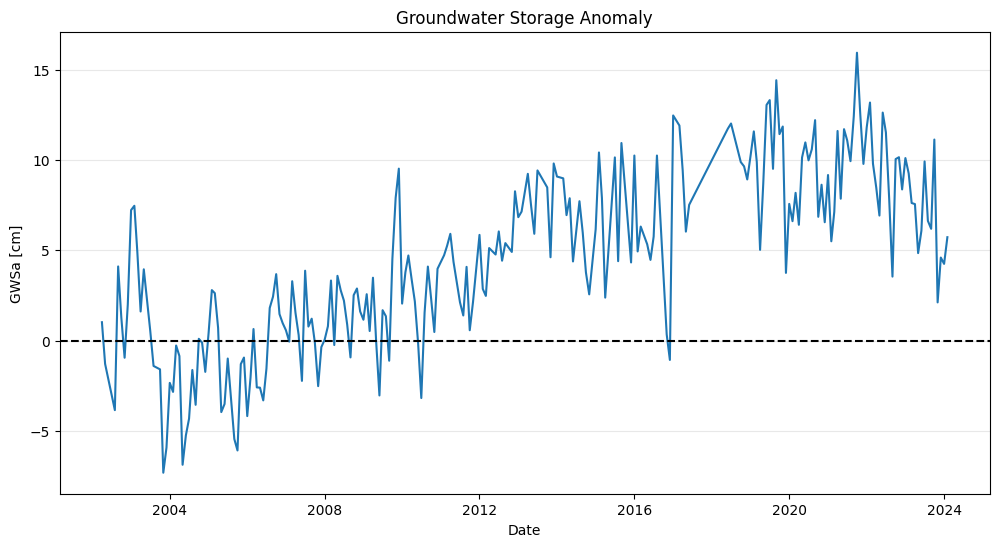

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['GWSa'], linestyle='-')
ax.set_xlabel('Date')
ax.set_ylabel('GWSa [cm]')
ax.set_title('Groundwater Storage Anomaly')
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgray', alpha=0.5)
ax.axhline(0, color='black', linestyle='--', linewidth=1.5)

plt.savefig('gwsa.png', dpi=300) # export plot to png in 300 dpi

plt.show()

## Plot with error bounds

Fill between error bounds lines and main line. Add descriptive labels.


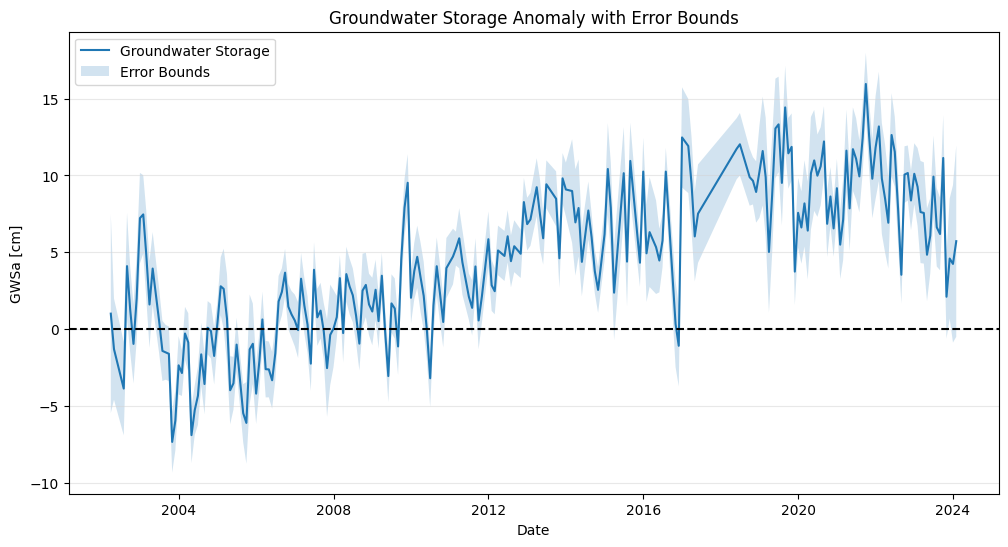

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['GWSa'], linestyle='-', label='Groundwater Storage')
ax.set_xlabel('Date')
ax.set_ylabel('GWSa [cm]')
ax.set_title('Groundwater Storage Anomaly with Error Bounds')
ax.fill_between(df.index, df['error_low'], df['error_high'], alpha=0.2, label='Error Bounds')
ax.legend()
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgray', alpha=0.5)
ax.axhline(0, color='black', linestyle='--', linewidth=1.5)

plt.savefig('gwsa_errors.png', dpi=300) # export plot to png in 300 dpi

plt.show()

# Visualizing the data gaps

The raw data includes gaps. If you look at each row you will notice that the subsequent row sometimes is several months later. Next we will make a copy of the dataframe and add the missing months with NaN values.

In [ ]:
# Copy the dataframe

df_gaps = df.copy()

# Create a complete date range from the first to the last date in the index, at monthly frequency
full_date_range = pd.date_range(start=df_gaps.index.min(), end=df_gaps.index.max(), freq='MS')

# Reindex the dataframe with the full date range. Missing dates will be filled with NaN.
df_gaps = df_gaps.reindex(full_date_range)

display(df_gaps.head())

orig_num_rows = len(df)
new_num_rows = len(df_gaps)
print(f"Number of rows in original dataframe: {orig_num_rows}")
print(f"Number of rows after reindexing: {len(df_gaps)}")
print(f"Number of rows added: {new_num_rows - orig_num_rows}")

,GWSa,error_low,error_high,Groundwater Storage (Calculated).1,Groundwater Storage (Calculated) Error Range (low).1,Groundwater Storage (Calculated) Error Range (high).1,Groundwater Storage (Calculated).2,Groundwater Storage (Calculated) Error Range (low).2,Groundwater Storage (Calculated) Error Range (high).2
2002-04-01,1.015,-5.454,7.485,1.015,-5.454,7.485,1.015,-5.454,7.485
2002-05-01,-1.295,-4.587,1.998,-1.295,-4.587,1.998,-1.295,-4.587,1.998
2002-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-01,-3.858,-6.901,-0.815,-3.858,-6.901,-0.815,-3.858,-6.901,-0.815


Number of rows in original dataframe: 228
Number of rows after reindexing: 263
Number of rows added: 35


## Create line plot with gaps

Simple line plot with gaps


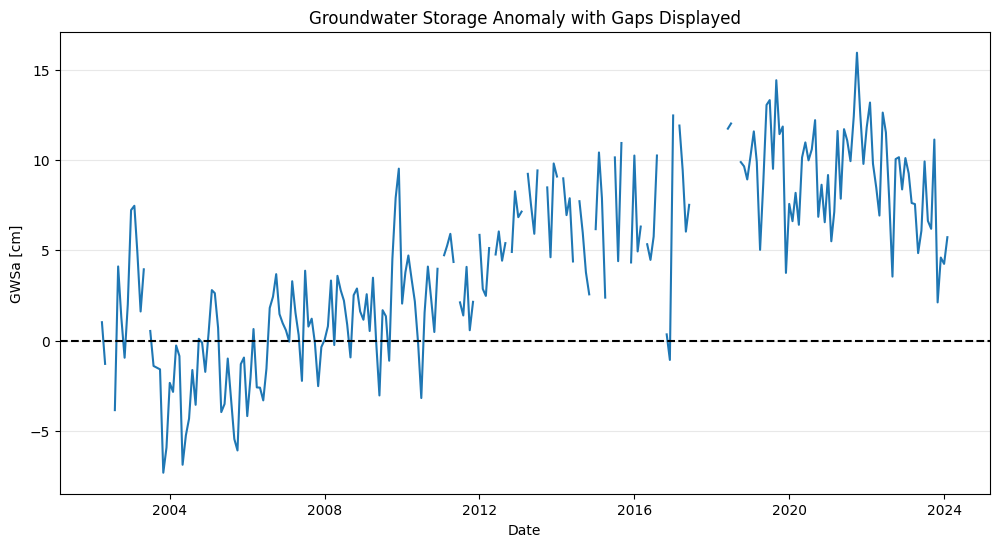

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
# Plot the 'ts' column. Matplotlib automatically handles NaNs by creating gaps.
ax.plot(df_gaps.index, df_gaps['GWSa'], linestyle='-', label='Groundwater Storage')
ax.set_xlabel('Date')
ax.set_ylabel('GWSa [cm]')
ax.set_title('Groundwater Storage Anomaly with Gaps Displayed')
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgray', alpha=0.5)
ax.axhline(0, color='black', linestyle='--', linewidth=1.5)

plt.savefig('gwsa_gaps.png', dpi=300) # export plot to png in 300 dpi

plt.show()

# Create plot with error bounds and gaps

Same thing but with error bounds.

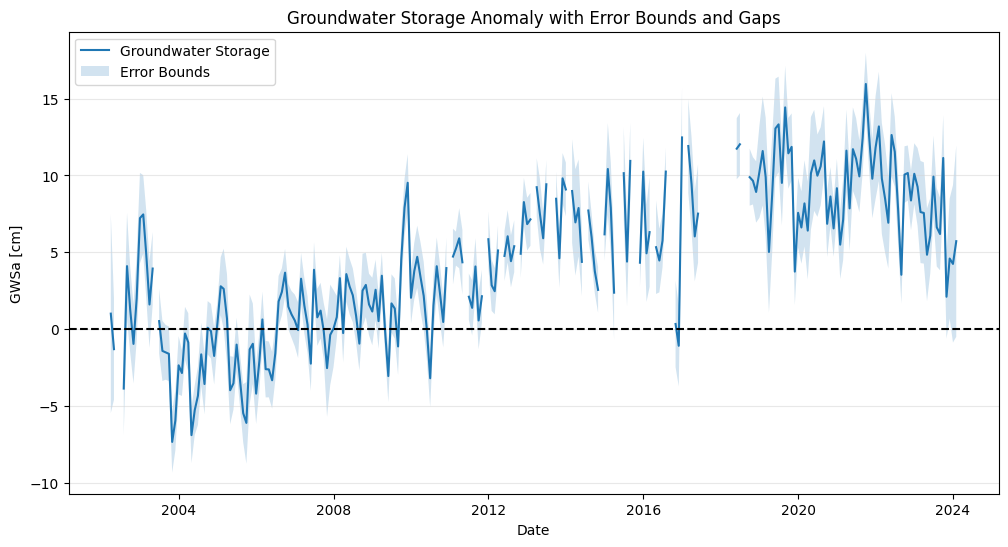

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_gaps.index, df_gaps['GWSa'], linestyle='-', label='Groundwater Storage')
# Need to reindex the original df error bounds to match df_plot index
df_reindexed = df.reindex(df_gaps.index)
ax.fill_between(df_reindexed.index, df_reindexed['error_low'], df_reindexed['error_high'], alpha=0.2, label='Error Bounds')
ax.set_xlabel('Date')
ax.set_ylabel('GWSa [cm]')
ax.set_title('Groundwater Storage Anomaly with Error Bounds and Gaps')
ax.legend()
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgray', alpha=0.5)
ax.axhline(0, color='black', linestyle='--', linewidth=1.5)

plt.savefig('gwsa_errors_gaps.png', dpi=300) # export plot to png in 300 dpi

plt.show()

# Export CSV file for gap filling

There is another colab notebook that does gap filling. Prepare a simple dataframe with a date and GWSa column for export to CSV for use that with that code.

In [ ]:
gws_gaps_df = df[['GWSa']].copy()
gws_gaps_df = gws_gaps_df.rename(columns={'GWSa': 'ts'})
display(gws_gaps_df.head())

,ts
Date,
2002-04-01,1.015
2002-05-01,-1.295
2002-08-01,-3.858
2002-09-01,4.106
2002-10-01,1.271


In [ ]:
# Export the new dataframe to a CSV file
gws_gaps_df.to_csv('haiti_gaps.csv', index=True)
